## Init

In [4]:
# feffi module lives one level up current dir
import os
if not os.path.isdir('feffi'): #if not already in right place - hacky!
    os.chdir("../") #for feffi to work

import feffi
from fenics import *
from mshr import *
import matplotlib.pyplot as plt
import numpy as np

## 2D constant linear x-wise left compression with structured mesh
Run 3 steps of the Lid Driven Cavity experiment, then compress the mesh x-wise with a factor of 0.9. Need to rebuild the bounding box tree as that is not automatically done and who knows why. Run an extra timestep then.

[16:23:27] BCs were only given for V, Q spaces.
[16:23:27] BCs - Boundary right, space V[0] (marker 1), value 0
[16:23:27] BCs - Boundary right, space V[1] (marker 1), value 0
[16:23:27] BCs - Boundary bottom, space V[0] (marker 3), value 0
[16:23:27] BCs - Boundary bottom, space V[1] (marker 3), value 0
[16:23:27] BCs - Boundary left, space V[0] (marker 2), value 0
[16:23:27] BCs - Boundary left, space V[1] (marker 2), value 0
[16:23:27] BCs - Boundary top, space V[0] (marker 4), value 1
[16:23:27] BCs - Boundary top, space V[1] (marker 4), value 0
[16:23:27] BCs - Point (0, 0), space Q, value 0
[16:23:27] Initialized simulation.
[16:23:27] Running parameters:
{'final_time': 10000000000, 'steps_n': 10, 'simulation_precision': -5, 'degree_V': 2, 'degree_P': 1, 'degree_T': 1, 'degree_S': 1, 'convert_from_ms_to_kmh': False, 'g': 0, 'nu': [0.01], 'alpha': [1], 'rho_0': 1, 'beta': 0, 'gamma': 0, 'T_0': 1, 'S_0': 35, 'Omega_0': '-5e-5', 'domain': 'square', 'domain_size_x': 2, 'domain_size_y

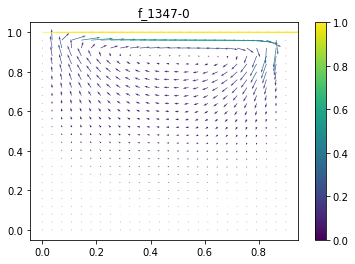

[16:23:35] Plotting <dolfin.cpp.generation.UnitSquareMesh object at 0x7f87afabb130>...


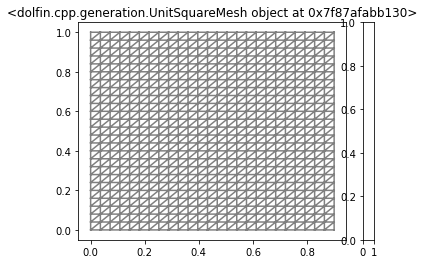

In [5]:
feffi.parameters.define_parameters({
    'config_file' : 'feffi/config/lid-driven-cavity.yml',
})

mesh = feffi.mesh.create_mesh()
f_spaces = feffi.functions.define_function_spaces(mesh)
f = feffi.functions.define_functions(f_spaces)
domain = feffi.boundaries.Domain(mesh, f_spaces)
simul = feffi.simulation.Simulation(f, domain.BCs)
for i in range(3):
    simul.timestep()

# Compress mesh x-wise with factor 0.9
bmesh = BoundaryMesh(mesh, "exterior")
for x in bmesh.coordinates():
    x[0] *= 0.9
ALE.move(mesh, bmesh)
mesh.bounding_box_tree().build(mesh)

simul.timestep()

feffi.plot.plot_single(f['u_'], display=True)
feffi.plot.plot_single(mesh, display=True)

## 2D repeated linear x-wise left compression (structured mesh)
Repeatedly run 1 step of the Lid Driven Cavity experiment, then compress the mesh x-wise with a factor of 0.07 and  rebuild the bounding box tree.

[16:27:31] Plotting Starting mesh...


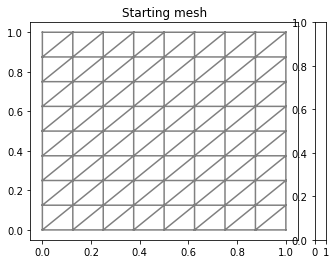

[16:27:31] BCs were only given for V, Q spaces.
[16:27:31] BCs - Boundary right, space V[0] (marker 1), value 0
[16:27:31] BCs - Boundary right, space V[1] (marker 1), value 0
[16:27:31] BCs - Boundary bottom, space V[0] (marker 3), value 0
[16:27:31] BCs - Boundary bottom, space V[1] (marker 3), value 0
[16:27:31] BCs - Boundary left, space V[0] (marker 2), value 0
[16:27:31] BCs - Boundary left, space V[1] (marker 2), value 0
[16:27:31] BCs - Boundary top, space V[0] (marker 4), value 1
[16:27:31] BCs - Boundary top, space V[1] (marker 4), value 0
[16:27:31] BCs - Point (0, 0), space Q, value 0
[16:27:31] Initialized simulation.
[16:27:31] Running parameters:
{'final_time': 10000000000, 'steps_n': 10, 'simulation_precision': -5, 'degree_V': 2, 'degree_P': 1, 'degree_T': 1, 'degree_S': 1, 'convert_from_ms_to_kmh': False, 'g': 0, 'nu': [0.01], 'alpha': [1], 'rho_0': 1, 'beta': 0, 'gamma': 0, 'T_0': 1, 'S_0': 35, 'Omega_0': '-5e-5', 'domain': 'square', 'domain_size_x': 2, 'domain_size_y



Mesh hmax is 0.1767766952966369



[16:27:31] Timestep 0 of 100000000000:
[16:27:31]   Non-linearity u-P solved in 4 steps.
[16:27:31]   ||u|| = 0.13626, ||u||_8 = 1.0, ||u-u_n|| = 0.13626, ||u-u_n||/||u|| = 1.0, div(u) = 1e-17
[16:27:31]   ||p|| = 0.05643, ||p||_8 = 0.34768, ||p-p_n|| = 0.05643, ||p-p_n||/||p|| = 1.0
[16:27:31] Plotting f_1669-0...


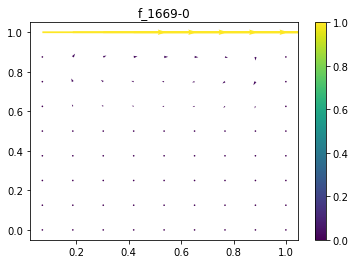

[16:27:32] Plotting Mesh with left x = 0.07...


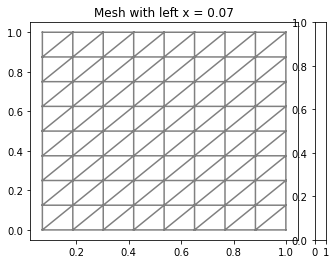



Mesh hmax is 0.1707016769103339



[16:27:33] Plotting f_1669-0...


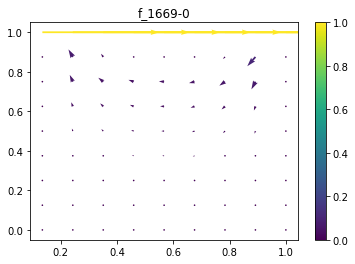

[16:27:33] Plotting Mesh with left x = 0.1351...


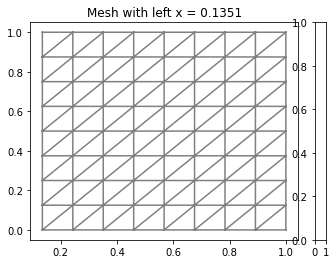

[16:27:34] Plotting f_1669-0...




Mesh hmax is 0.16526739743896862



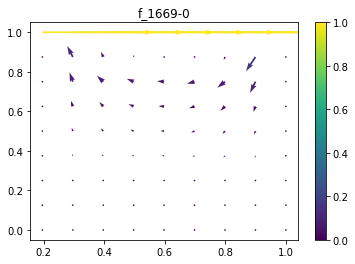

[16:27:34] Plotting Mesh with left x = 0.195643...


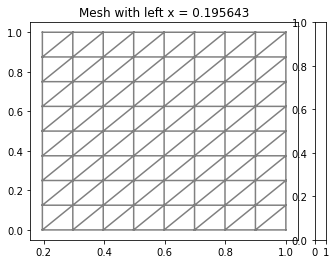



Mesh hmax is 0.16041889420012417



[16:27:35] Plotting f_1669-0...


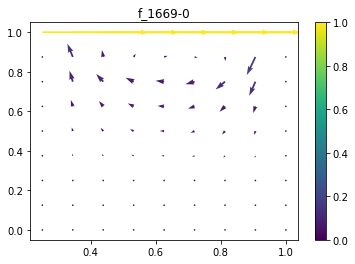

[16:27:35] Plotting Mesh with left x = 0.25194799...


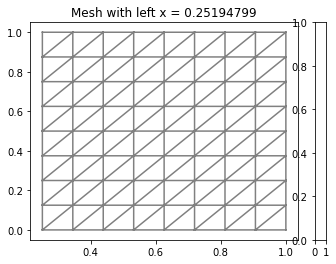

[16:27:36] Plotting f_1669-0...




Mesh hmax is 0.1561040222928809



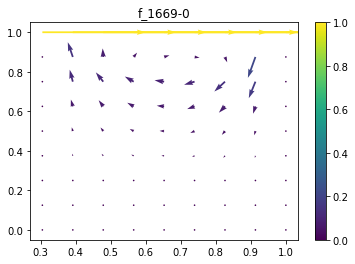

[16:27:36] Plotting Mesh with left x = 0.3043116307...


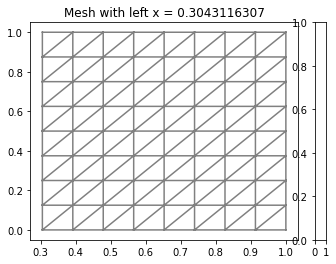

[16:27:37] Plotting f_1669-0...




Mesh hmax is 0.15227351558848465



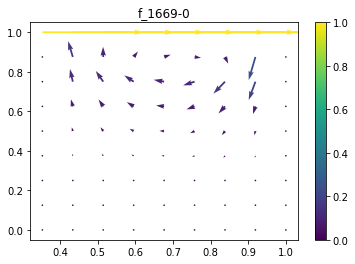

[16:27:37] Plotting Mesh with left x = 0.353009816551...


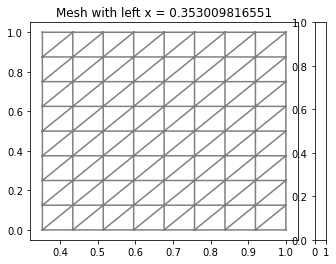



Mesh hmax is 0.14888105033252283



[16:27:37] Plotting f_1669-0...


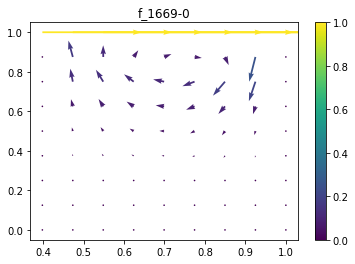

[16:27:38] Plotting Mesh with left x = 0.39829912939243...


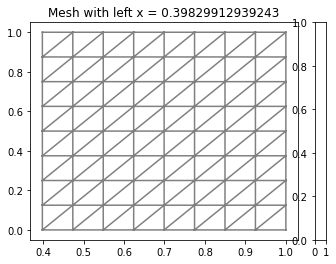

[16:27:38] Plotting f_1669-0...




Mesh hmax is 0.1458832976265783



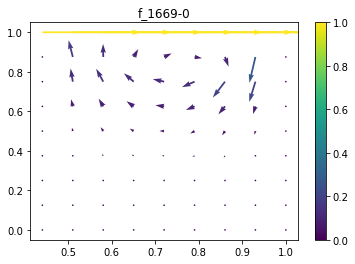

[16:27:38] Plotting Mesh with left x = 0.4404181903349599...


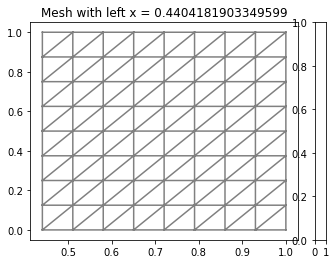

[16:27:39] Plotting f_1669-0...




Mesh hmax is 0.14323995392936825



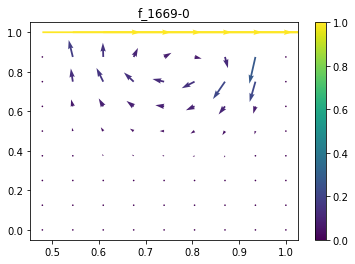

[16:27:39] Plotting Mesh with left x = 0.4795889170115127...


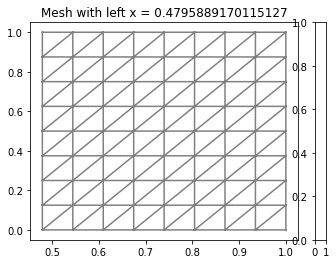

[16:27:40] Plotting f_1669-0...




Mesh hmax is 0.14091374219365393



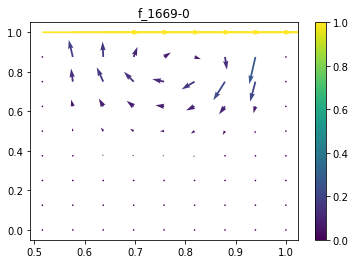

[16:27:40] Plotting Mesh with left x = 0.5160176928207068...


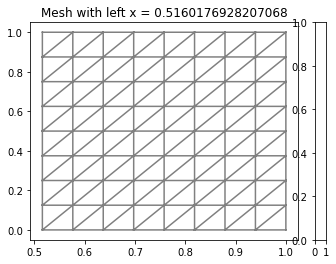

In [3]:
feffi.parameters.define_parameters({
    'config_file' : 'feffi/config/lid-driven-cavity.yml',
})

# Structured mesh
mesh = UnitSquareMesh(8,8)
feffi.plot.plot_single(mesh, display=True, title="Starting mesh")

f_spaces = feffi.functions.define_function_spaces(mesh)
f = feffi.functions.define_functions(f_spaces)
domain = feffi.boundaries.Domain(mesh, f_spaces)
simul = feffi.simulation.Simulation(f, domain.BCs)

# Repeatedly run 1 timestep and deform mesh
for x in range(10):
    print("\n\nMesh hmax is {}\n".format(mesh.hmax()))
    simul.timestep()

    # 0.02 x-wise displacement
    disp = Expression(("0.07*(left-x[0])", "0"),
                      left=max(mesh.coordinates()[:,0]), degree=2)
    ALE.move(mesh, disp)

    mesh.bounding_box_tree().build(mesh)

    feffi.plot.plot_single(f['u_'], display=True)
    feffi.plot.plot_single(mesh, display=True,
                           title="Mesh with left x = {}".format(min(mesh.coordinates()[:,0])))

## 2D repeated linear x-wise left compression (UNstructured mesh)
Repeatedly run 1 step of the Lid Driven Cavity experiment, then compress the mesh x-wise with a factor of 0.07 and  rebuild the bounding box tree.

[16:29:04] Plotting Starting mesh...


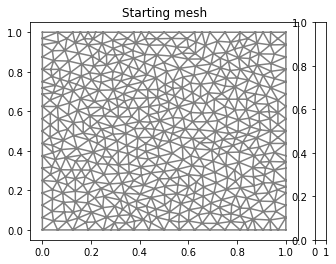

[16:29:04] BCs were only given for V, Q spaces.
[16:29:04] BCs - Boundary right, space V[0] (marker 1), value 0
[16:29:04] BCs - Boundary right, space V[1] (marker 1), value 0
[16:29:04] BCs - Boundary bottom, space V[0] (marker 3), value 0
[16:29:04] BCs - Boundary bottom, space V[1] (marker 3), value 0
[16:29:04] BCs - Boundary left, space V[0] (marker 2), value 0
[16:29:04] BCs - Boundary left, space V[1] (marker 2), value 0
[16:29:04] BCs - Boundary top, space V[0] (marker 4), value 1
[16:29:04] BCs - Boundary top, space V[1] (marker 4), value 0
[16:29:04] BCs - Point (0, 0), space Q, value 0
[16:29:04] Initialized simulation.
[16:29:04] Running parameters:
{'final_time': 10000000000, 'steps_n': 10, 'simulation_precision': -5, 'degree_V': 2, 'degree_P': 1, 'degree_T': 1, 'degree_S': 1, 'convert_from_ms_to_kmh': False, 'g': 0, 'nu': [0.01], 'alpha': [1], 'rho_0': 1, 'beta': 0, 'gamma': 0, 'T_0': 1, 'S_0': 35, 'Omega_0': '-5e-5', 'domain': 'square', 'domain_size_x': 2, 'domain_size_y



Mesh hmax is 0.07060702204809378



[16:29:07] Timestep 0 of 100000000000:
[16:29:07]   Non-linearity u-P solved in 4 steps.
[16:29:07]   ||u|| = 0.11934, ||u||_8 = 1.0, ||u-u_n|| = 0.11934, ||u-u_n||/||u|| = 1.0, div(u) = 1e-3
[16:29:07]   ||p|| = 0.66631, ||p||_8 = 2.11681, ||p-p_n|| = 0.66631, ||p-p_n||/||p|| = 1.0
[16:29:07] Plotting f_34-0...


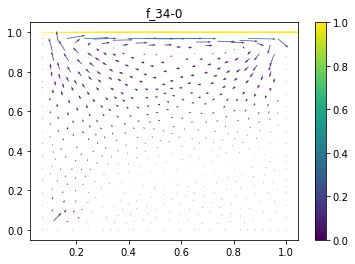

[16:29:07] Plotting Mesh with left x = 0.07...


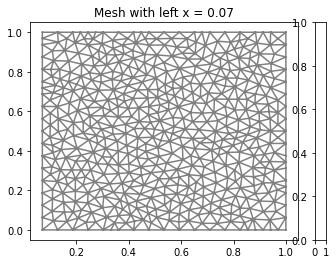



Mesh hmax is 0.07001371963047415



[16:29:09] Plotting f_34-0...


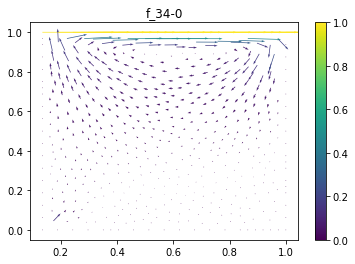

[16:29:09] Plotting Mesh with left x = 0.1351...


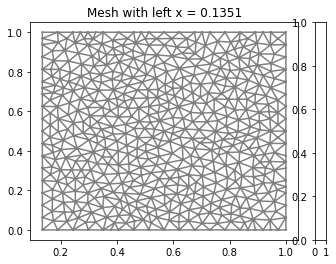



Mesh hmax is 0.07001313779151307



[16:29:12] Plotting f_34-0...


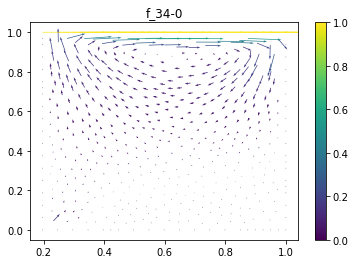

[16:29:12] Plotting Mesh with left x = 0.195643...


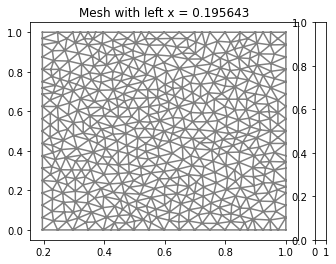



Mesh hmax is 0.07001263455509604



[16:29:14] Plotting f_34-0...


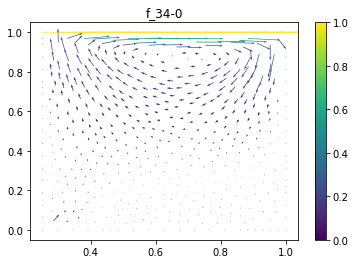

[16:29:14] Plotting Mesh with left x = 0.25194799...


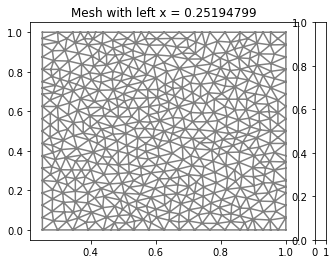



Mesh hmax is 0.07001219930300177



[16:29:16] Plotting f_34-0...


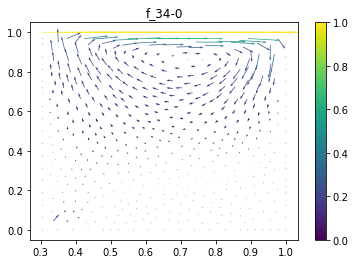

[16:29:17] Plotting Mesh with left x = 0.3043116307...


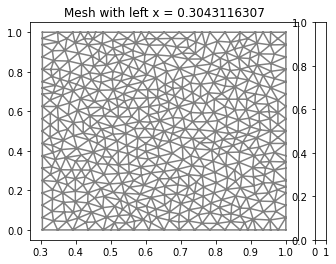



Mesh hmax is 0.0700118228512832



[16:29:19] Plotting f_34-0...


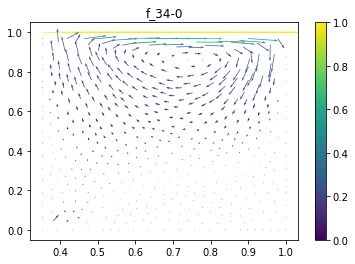

[16:29:19] Plotting Mesh with left x = 0.353009816551...


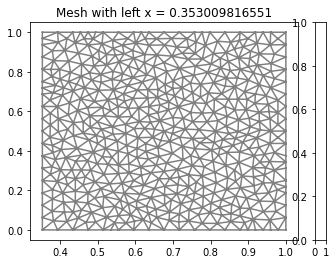



Mesh hmax is 0.07001149725655936



[16:29:21] Plotting f_34-0...


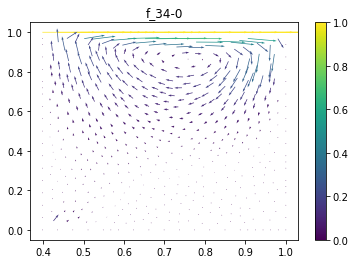

[16:29:21] Plotting Mesh with left x = 0.39829912939243...


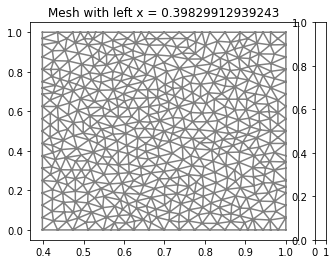



Mesh hmax is 0.07001121564846154



[16:29:23] Plotting f_34-0...


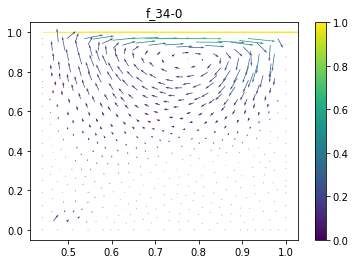

[16:29:24] Plotting Mesh with left x = 0.4404181903349599...


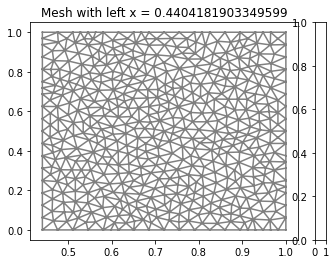



Mesh hmax is 0.0700109720847042



[16:29:26] Plotting f_34-0...


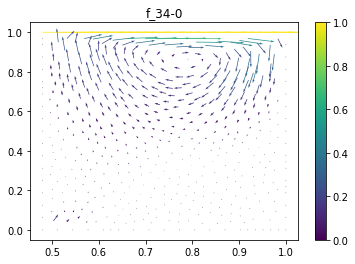

[16:29:26] Plotting Mesh with left x = 0.4795889170115127...


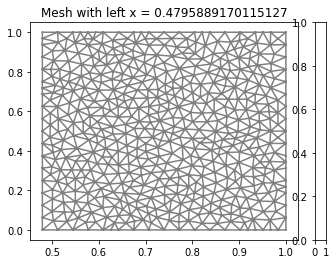



Mesh hmax is 0.07001076142572714



[16:29:28] Plotting f_34-0...


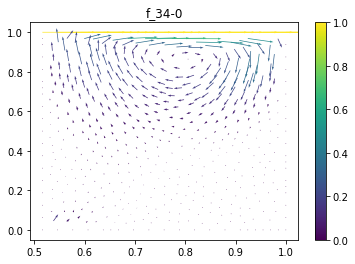

[16:29:28] Plotting Mesh with left x = 0.5160176928207068...


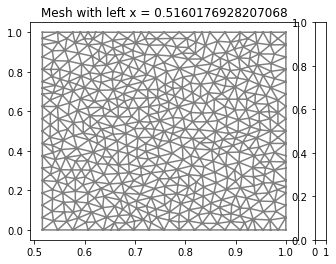

In [2]:
feffi.parameters.define_parameters({
    'config_file' : 'feffi/config/lid-driven-cavity.yml',
})

# Unstructured mesh
points = [Point(0,0), Point(1,0), Point(1,1), Point(0,1)] # square
#points = [Point(0,0), Point(10,0), Point(10,1), Point(0,1)] # long domain
domain = Polygon(points)
mesh = generate_mesh(domain, 16, 'cgal')

feffi.plot.plot_single(mesh, display=True, title="Starting mesh")

f_spaces = feffi.functions.define_function_spaces(mesh)
f = feffi.functions.define_functions(f_spaces)
domain = feffi.boundaries.Domain(mesh, f_spaces)
simul = feffi.simulation.Simulation(f, domain.BCs)

# Repeatedly run 1 timestep and deform mesh
for x in range(10):
    print("\n\nMesh hmax is {}\n".format(mesh.hmax()))
    simul.timestep()

    # 0.02 x-wise displacement
    disp = Expression(("0.07*(left-x[0])", "0"),
                      left=max(mesh.coordinates()[:,0]), degree=2)
    ALE.move(mesh, disp)

    mesh.bounding_box_tree().build(mesh)

    feffi.plot.plot_single(f['u_'], display=True)
    feffi.plot.plot_single(mesh, display=True,
                           title="Mesh with left x = {}".format(min(mesh.coordinates()[:,0])))

## 2D pointwise x-wise left compression (structured mesh)
- Run 1 step of the Lid Driven Cavity experiment.
- Store indexes of mesh points that belong to left boundary.
- Move left boundary points x-wise, each of a different random amount, and rebuild the bounding box tree.

[16:24:09] Plotting Starting mesh...


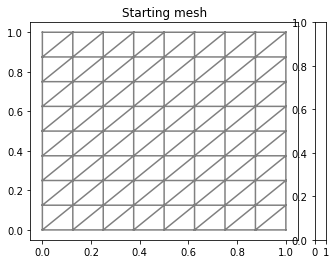

[16:24:10] BCs were only given for V, Q spaces.
[16:24:10] BCs - Boundary right, space V[0] (marker 1), value 0
[16:24:10] BCs - Boundary right, space V[1] (marker 1), value 0
[16:24:10] BCs - Boundary bottom, space V[0] (marker 3), value 0
[16:24:10] BCs - Boundary bottom, space V[1] (marker 3), value 0
[16:24:10] BCs - Boundary left, space V[0] (marker 2), value 0
[16:24:10] BCs - Boundary left, space V[1] (marker 2), value 0
[16:24:10] BCs - Boundary top, space V[0] (marker 4), value 1
[16:24:10] BCs - Boundary top, space V[1] (marker 4), value 0
[16:24:10] BCs - Point (0, 0), space Q, value 0
[16:24:10] Initialized simulation.
[16:24:10] Running parameters:
{'final_time': 10000000000, 'steps_n': 10, 'simulation_precision': -5, 'degree_V': 2, 'degree_P': 1, 'degree_T': 1, 'degree_S': 1, 'convert_from_ms_to_kmh': False, 'g': 0, 'nu': [0.01], 'alpha': [1], 'rho_0': 1, 'beta': 0, 'gamma': 0, 'T_0': 1, 'S_0': 35, 'Omega_0': '-5e-5', 'domain': 'square', 'domain_size_x': 2, 'domain_size_y



Mesh hmax is 0.1767766952966369



[16:24:10] Timestep 0 of 100000000000:
[16:24:10]   Non-linearity u-P solved in 4 steps.
[16:24:10]   ||u|| = 0.13626, ||u||_8 = 1.0, ||u-u_n|| = 0.13626, ||u-u_n||/||u|| = 1.0, div(u) = 1e-17
[16:24:10]   ||p|| = 0.05643, ||p||_8 = 0.34768, ||p-p_n|| = 0.05643, ||p-p_n||/||p|| = 1.0
[16:24:10] Plotting f_25-0...


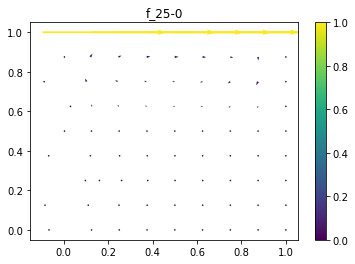

[16:24:11] Plotting Mesh with left x = -0.09632788600028117...


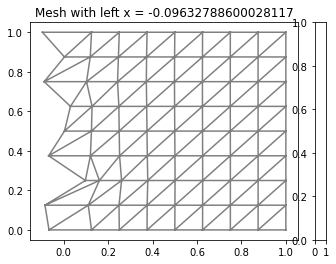



Mesh hmax is 0.275121187648664



[16:24:11] Plotting f_25-0...


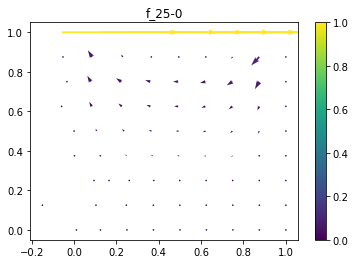

[16:24:11] Plotting Mesh with left x = -0.14920392562844398...


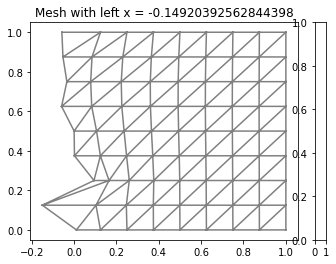

In [3]:
feffi.parameters.define_parameters({
    'config_file' : 'feffi/config/lid-driven-cavity.yml',
})

# Structured mesh
mesh = UnitSquareMesh(8,8)

feffi.plot.plot_single(mesh, display=True, title="Starting mesh")

f_spaces = feffi.functions.define_function_spaces(mesh)
f = feffi.functions.define_functions(f_spaces)
domain = feffi.boundaries.Domain(mesh, f_spaces)
simul = feffi.simulation.Simulation(f, domain.BCs)

# Get indexes of mesh points that belong to left boundary.
# Once we start moving them, this information is lost.
left_idxs = []
b_mesh = BoundaryMesh(mesh, 'exterior')
for p_idx in range(len(b_mesh.coordinates())):
    if domain.boundaries['left'].inside(b_mesh.coordinates()[p_idx], True):
        left_idxs.append(p_idx)

# Repeatedly run 1 timestep and deform mesh
for x in range(2):
    print("\n\nMesh hmax is {}\n".format(mesh.hmax()))
    simul.timestep()

    import random
    b_mesh = BoundaryMesh(mesh, 'exterior')
    for p_idx in left_idxs:
        b_mesh.coordinates()[p_idx][0] += (-1)**int(random.random()*10) * random.random()/10
        ALE.move(mesh, b_mesh)

    mesh.bounding_box_tree().build(mesh)

    feffi.plot.plot_single(f['u_'], display=True)
    feffi.plot.plot_single(mesh, display=True,
                           title="Mesh with left x = {}".format(min(mesh.coordinates()[:,0])))

## 2D x-wise left deformation wrt given points list (structured mesh)


[16:57:18] Plotting Starting mesh...


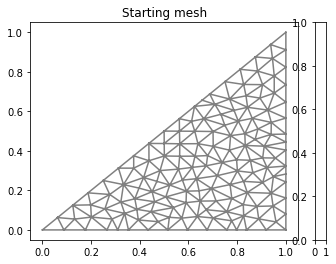

[16:57:18] BCs were only given for V, Q spaces.
[16:57:18] BCs - Boundary right, space V[0] (marker 1), value 0
[16:57:18] BCs - Boundary right, space V[1] (marker 1), value 0
[16:57:18] BCs - Boundary bottom, space V[0] (marker 3), value 0
[16:57:18] BCs - Boundary bottom, space V[1] (marker 3), value 0
[16:57:18] BCs - Boundary left, space V[0] (marker 2), value 0
[16:57:18] BCs - Boundary left, space V[1] (marker 2), value 0
[16:57:18] BCs - Boundary top, space V[0] (marker 4), value 1
[16:57:18] BCs - Boundary top, space V[1] (marker 4), value 0
[16:57:18] BCs - Point (0, 0), space Q, value 0
[16:57:18] Initialized simulation.
[16:57:18] Running parameters:
{'final_time': 10000000000, 'steps_n': 10, 'simulation_precision': -5, 'degree_V': 2, 'degree_P': 1, 'degree_T': 1, 'degree_S': 1, 'convert_from_ms_to_kmh': False, 'g': 0, 'nu': [0.01], 'alpha': [1], 'rho_0': 1, 'beta': 0, 'gamma': 0, 'T_0': 1, 'S_0': 35, 'Omega_0': '-5e-5', 'domain': 'square', 'domain_size_x': 2, 'domain_size_y



Mesh hmax is 0.09852321572093209



/home/stefano/Software/miniconda3/envs/fenics_env/lib/python3.8/site-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/stefano/Software/miniconda3/envs/fenics_env/lib/python3.8/site-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/stefano/Software/miniconda3/envs/fenics_env/lib/python3.8/site-packages/matplotlib/quiver.py:767: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/home/stefano/Software/miniconda3/envs/fenics_env/lib/python3.8/site-packages/matplotlib/quiver.py:780: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


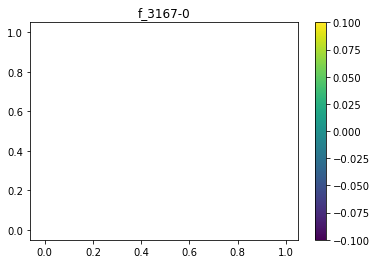

[16:57:19] Plotting Mesh with left x = -0.010044027782662423...


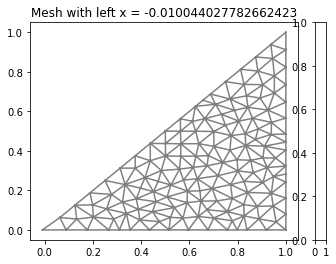

[16:57:20] Plotting f_3167-0...




Mesh hmax is 0.09852321572093209



/home/stefano/Software/miniconda3/envs/fenics_env/lib/python3.8/site-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/stefano/Software/miniconda3/envs/fenics_env/lib/python3.8/site-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/stefano/Software/miniconda3/envs/fenics_env/lib/python3.8/site-packages/matplotlib/quiver.py:767: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/home/stefano/Software/miniconda3/envs/fenics_env/lib/python3.8/site-packages/matplotlib/quiver.py:780: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


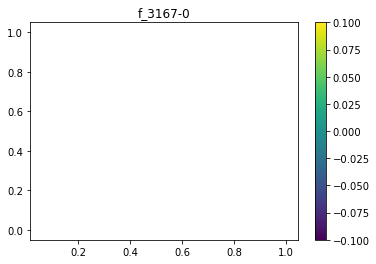

[16:57:20] Plotting Mesh with left x = 0.0625...


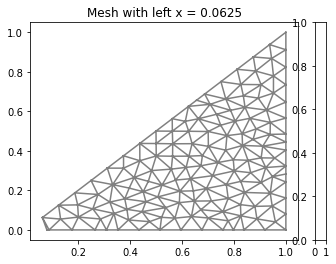

In [3]:
feffi.parameters.define_parameters({
    'config_file' : 'feffi/config/lid-driven-cavity.yml',
})

# Unstructured mesh
points = [Point(0,0), Point(1,0), Point(1,1)] # square
#points = [Point(0,0), Point(10,0), Point(10,1), Point(0,1)] # long domain
domain = Polygon(points)
mesh = generate_mesh(domain, 10, 'cgal')

feffi.plot.plot_single(mesh, display=True, title="Starting mesh")

f_spaces = feffi.functions.define_function_spaces(mesh)
f = feffi.functions.define_functions(f_spaces)
domain = feffi.boundaries.Domain(mesh, f_spaces)
simul = feffi.simulation.Simulation(f, domain.BCs)

left_idxs = []
b_mesh = BoundaryMesh(mesh, 'exterior')
for p_idx in range(len(b_mesh.coordinates())):
    if domain.boundaries['left'].inside(b_mesh.coordinates()[p_idx], True):
        left_idxs.append(p_idx)

# Repeatedly run 1 timestep and deform mesh
for x in range(2):
    print("\n\nMesh hmax is {}\n".format(mesh.hmax()))
    simul.timestep()

    import random
    b_mesh = BoundaryMesh(mesh, 'exterior')
    for p_idx in left_idxs:
            b_mesh.coordinates()[p_idx][0] += (-1)**int(random.random()*10) * random.random()/10
            ALE.move(mesh, b_mesh)
            #ALE.move(mesh, disp)


    mesh.bounding_box_tree().build(mesh)

    feffi.plot.plot_single(f['u_'], display=True)
    feffi.plot.plot_single(mesh, display=True,
                           title="Mesh with left x = {}".format(min(mesh.coordinates()[:,0])))


## 3D

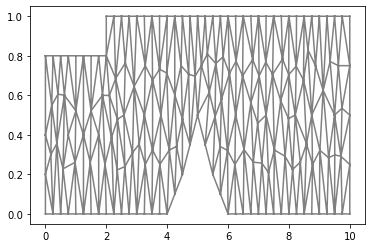

[17:00:11] BCs were only given for V, Q spaces.


AttributeError: module 'dolfin.mesh' has no attribute 'geometric_dimension'

In [6]:
feffi.parameters.define_parameters({
    'config_file' : 'feffi/config/lid-driven-cavity-3D.yml',
})

points = [(0,0), (4,0), (4.5,0.2), (5, 0.5), (5.5, 0.2), (6,0), (10,0), (10,1), (2,1), (2,0.8), (0, 0.8)]
Points = [Point(p) for p in points]
g2d = Polygon(Points)
m = generate_mesh(g2d, 20)
#g3d = mshr.Extrude2D(g2d, 1)
#m = mshr.generate_mesh(g2d, 70)
#m.coordinates()[:] = np.array([m.coordinates()[:, 0], m.coordinates()[:, 2], m.coordinates()[:, 1]]).transpose()
plot(m)
plt.show()

f_spaces = feffi.functions.define_function_spaces(m)
f = feffi.functions.define_functions(f_spaces)
domain = feffi.boundaries.Domain(mesh, f_spaces)
simul = feffi.simulation.Simulation(f, domain.BCs)
#simul.run()
for i in range(50):
    simul.timestep()
    if i % 10 == 0:
        feffi.plot.plot_solutions(f, display=True)